# EDA

<img src="https://i.ibb.co/WPcTTkw/finance-analysis.png" width=500 align="center">

In [0]:
library(corrplot)
library(rsample)
library(caret)
library(Hmisc)
library(dplyr)

Warning message:
"package 'corrplot' was built under R version 3.6.2"corrplot 0.84 loaded
Warning message:
"package 'rsample' was built under R version 3.6.2"Loading required package: tidyr
Warning message:
"package 'caret' was built under R version 3.6.2"
Attaching package: 'caret'

The following object is masked from 'package:survival':

    cluster


Attaching package: 'dplyr'

The following objects are masked from 'package:Hmisc':

    src, summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [0]:
library(Hmisc)

In [0]:
train_identity <- read.csv("train_identity.csv", header = TRUE)
describe(train_identity)

train_identity 

 41  Variables      144233  Observations
--------------------------------------------------------------------------------
TransactionID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  144233        0   144233        1  3236329   203099  3013717  3032216 
     .25      .50      .75      .90      .95 
 3077142  3198818  3392923  3513967  3543286 

lowest : 2987004 2987008 2987010 2987011 2987016
highest: 3577521 3577526 3577529 3577531 3577534
--------------------------------------------------------------------------------
id_01 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  144233        0       77    0.812   -10.17    10.97      -40      -20 
     .25      .50      .75      .90      .95 
     -10       -5       -5        0        0 

lowest : -100  -99  -96  -95  -94, highest:   -8   -7   -6   -5    0
--------------------------------------------------------------------------------
id_02 
       n  missing distinc

In [0]:
str(train_identity)

'data.frame':	144233 obs. of  41 variables:
 $ TransactionID: int  2987004 2987008 2987010 2987011 2987016 2987017 2987022 2987038 2987040 2987048 ...
 $ id_01        : num  0 -5 -5 -5 0 -5 -15 0 -10 -5 ...
 $ id_02        : num  70787 98945 191631 221832 7460 ...
 $ id_03        : num  NA NA 0 NA 0 3 NA 0 0 NA ...
 $ id_04        : num  NA NA 0 NA 0 0 NA 0 0 NA ...
 $ id_05        : num  NA 0 0 0 1 3 NA 0 0 0 ...
 $ id_06        : num  NA -5 0 -6 0 0 NA -10 0 0 ...
 $ id_07        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ id_08        : num  NA NA NA NA NA NA NA NA NA NA ...
 $ id_09        : num  NA NA 0 NA 0 3 NA 0 0 NA ...
 $ id_10        : num  NA NA 0 NA 0 0 NA 0 0 NA ...
 $ id_11        : num  100 100 100 100 100 100 NA 100 100 100 ...
 $ id_12        : Factor w/ 2 levels "Found","NotFound": 2 2 2 2 2 2 2 1 2 2 ...
 $ id_13        : num  NA 49 52 52 NA 52 14 NA 52 52 ...
 $ id_14        : num  -480 -300 NA NA -300 -300 NA -300 NA NA ...
 $ id_15        : Factor w/ 4 levels "",

In [0]:
dim(train_identity)

[1] 144233     41

In [0]:
library(ggplot2)

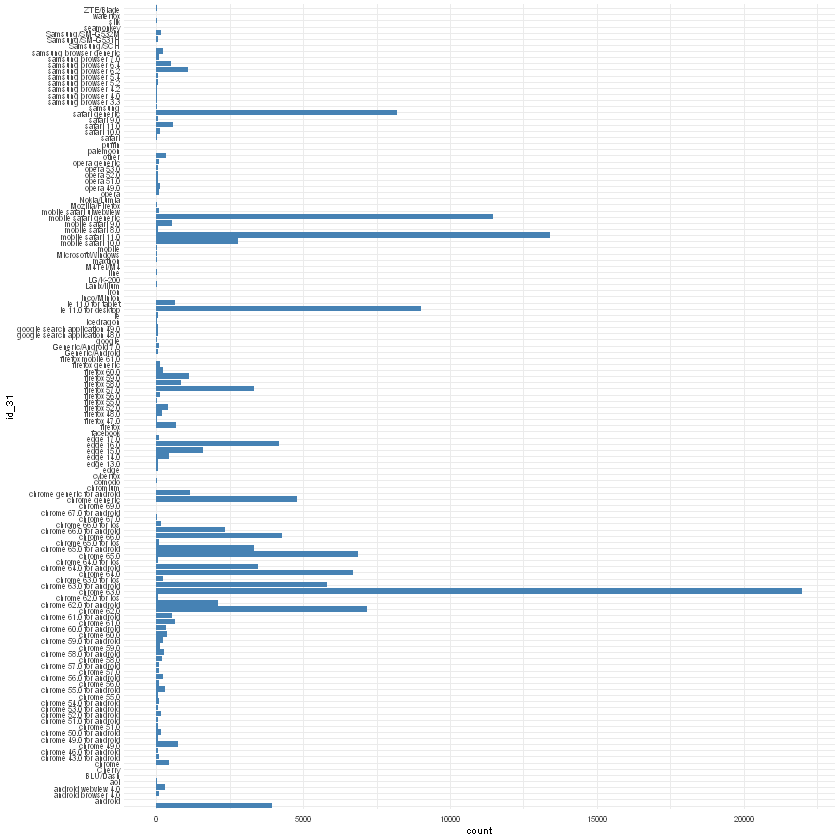

In [0]:
ggplot(data=train_identity, aes(x=id_31)) + geom_bar(fill="steelblue") + coord_flip() + theme_minimal(base_size = 6)

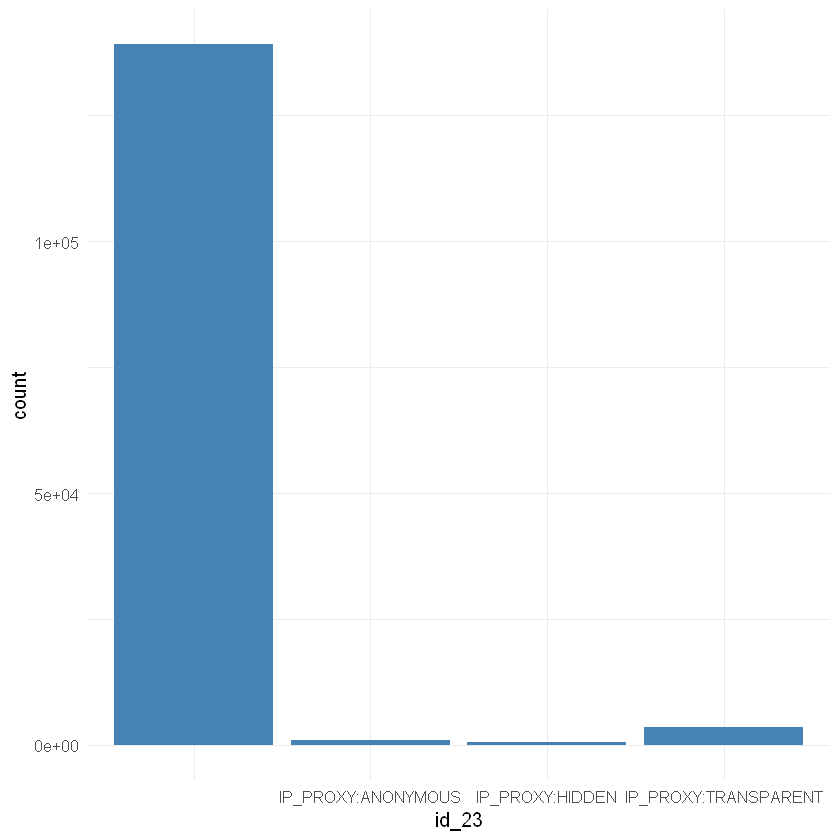

In [0]:
ggplot(data=train_identity, aes(x=id_23)) + geom_bar(fill="steelblue") + theme_minimal(base_size = 12)

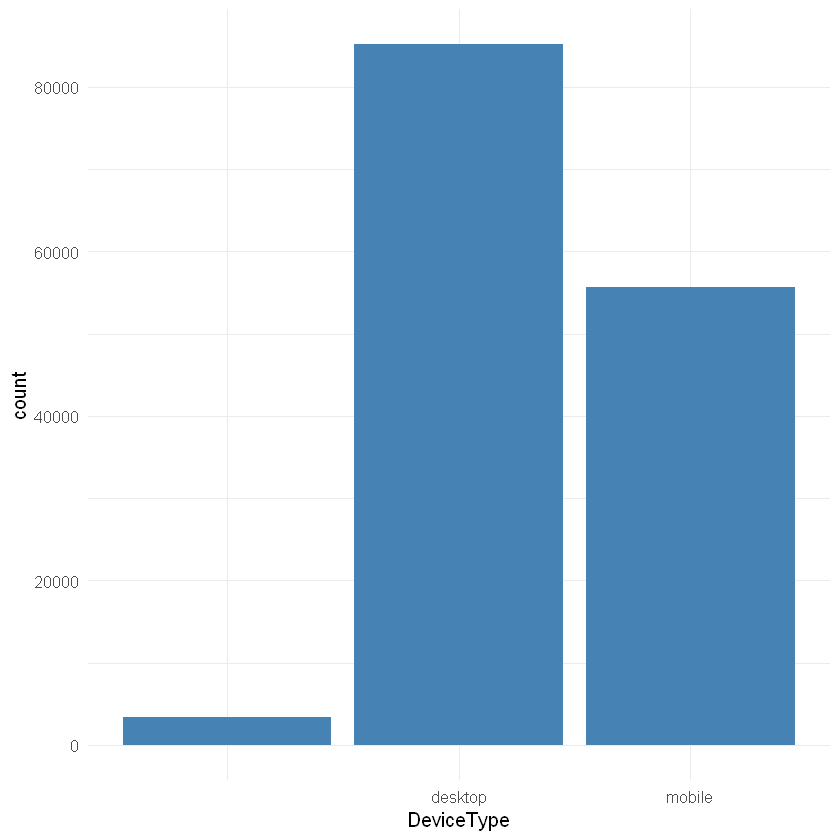

In [0]:
ggplot(data=train_identity, aes(x=DeviceType)) + geom_bar(fill="steelblue") + theme_minimal(base_size = 12)

In [0]:
library(forcats)

Warning message:
"package 'forcats' was built under R version 3.6.2"

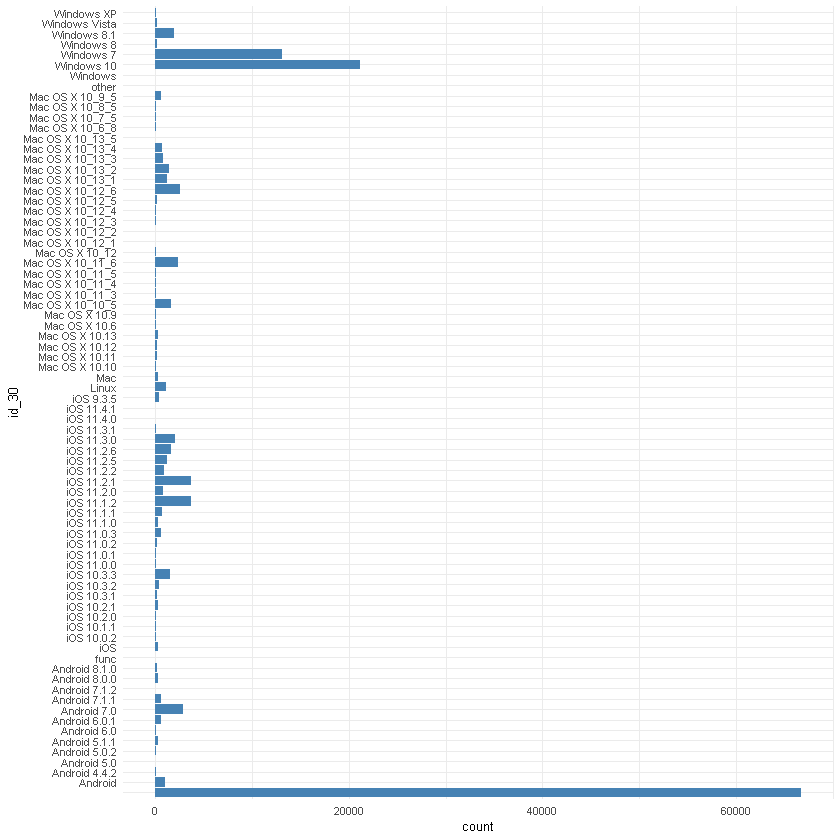

In [0]:
ggplot(data=train_identity, aes(x=id_30)) + geom_bar(fill="steelblue") + coord_flip() + theme_minimal(base_size = 8)

In [0]:
numeric <- unlist(lapply(train_identity, is.numeric)) 
numeric_data <- train_identity[ , numeric]

Warning message:
"Removed 1551355 rows containing non-finite values (stat_bin)."

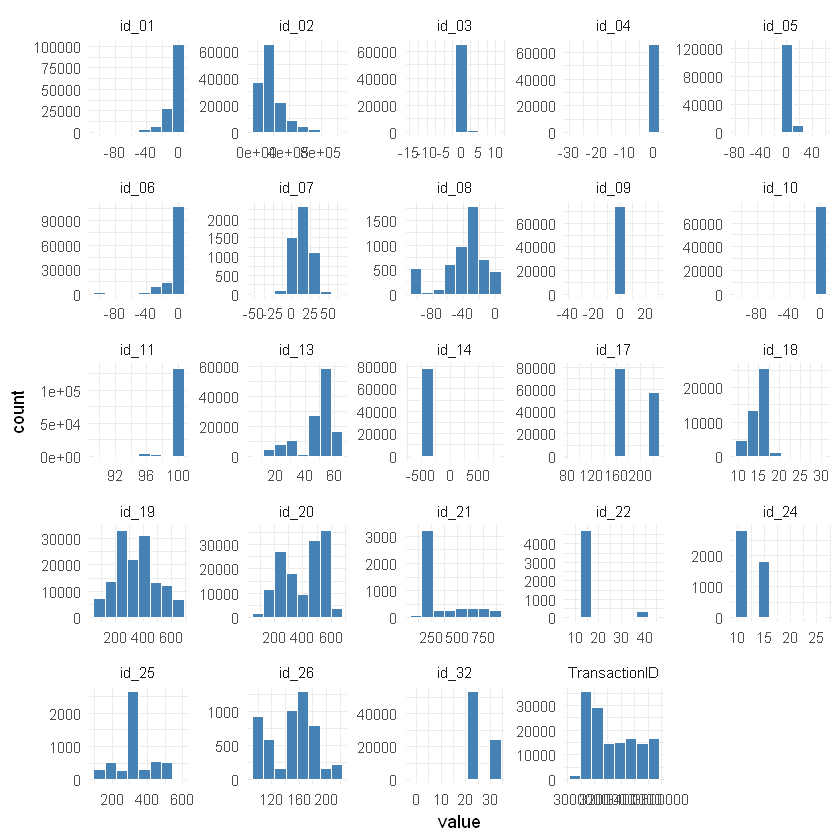

In [0]:
ggplot(gather(numeric_data), aes(value)) + 
    geom_histogram(fill = "steelblue", bins = 8, col = "white") + 
    facet_wrap(~key, scales = 'free' ) +
    theme_minimal()

Some of the ids are normally distributed

Warning message:
"Removed 1551355 rows containing non-finite values (stat_boxplot)."

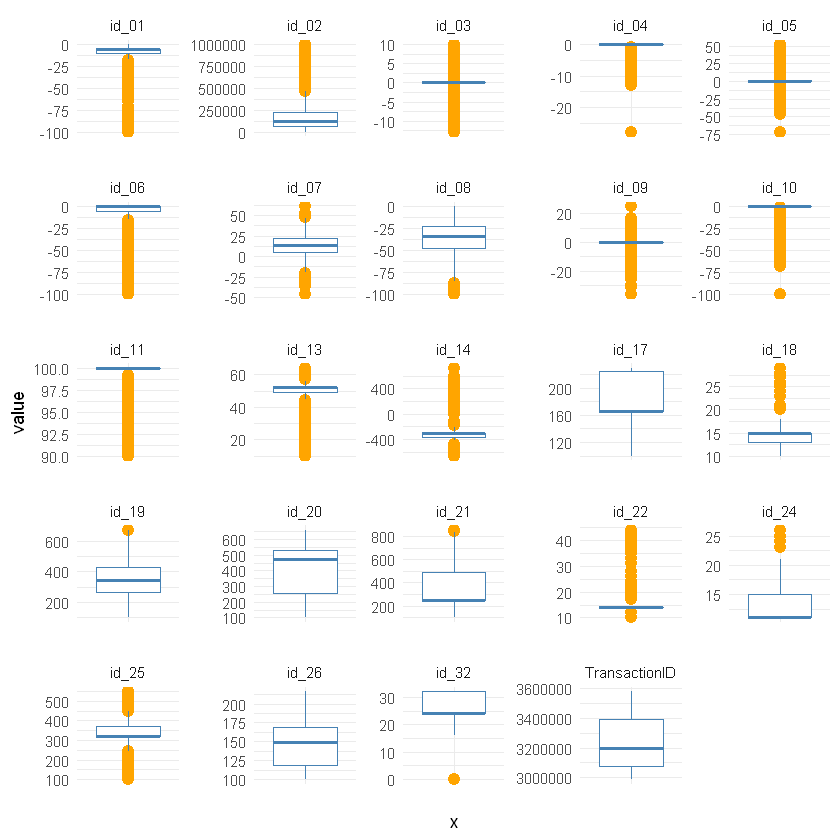

In [0]:
ggplot(gather(numeric_data), aes(x = "", y = value)) + 
    geom_boxplot(color = "steelblue", outlier.size=3, outlier.color='orange') + 
    facet_wrap(~key, scales = 'free') + 
    theme_minimal()

In [0]:
train_transaction <- read.csv("train_transaction.csv", header = TRUE)
describe(train_transaction)

train_transaction 

 394  Variables      590540  Observations
--------------------------------------------------------------------------------
TransactionID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  590540        0   590540        1  3282270   196847  3016527  3046054 
     .25      .50      .75      .90      .95 
 3134635  3282270  3429904  3518485  3548012 

lowest : 2987000 2987001 2987002 2987003 2987004
highest: 3577535 3577536 3577537 3577538 3577539
--------------------------------------------------------------------------------
isFraud 
       n  missing distinct     Info      Sum     Mean      Gmd 
  590540        0        2    0.101    20663  0.03499  0.06753 

--------------------------------------------------------------------------------
TransactionDT 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  590540        0   573349        1  7372311  5322346   751947  1361004 
     .25      .50      .75      .90      .95

TransactionDT(measured in seconds) - lowest is 1 day (86400s) and highest is 183 days <br> 
ProductCD - 5 different values (C H R S W) <br>
Card4 - 5 different levels (null, american express, discover, mastercard or visa) <br>
Card6 - Card type (charge card (prepaid card?), credit, debit, debit or credit, null) <br> 

In [0]:
levels(train_transaction$R_emaildomain)
levels(train_transaction$P_emaildomain)

[1] ""                 "aim.com"          "anonymous.com"    "aol.com"         
 [5] "att.net"          "bellsouth.net"    "cableone.net"     "centurylink.net" 
 [9] "cfl.rr.com"       "charter.net"      "comcast.net"      "cox.net"         
[13] "earthlink.net"    "embarqmail.com"   "frontier.com"     "frontiernet.net" 
[17] "gmail"            "gmail.com"        "gmx.de"           "hotmail.co.uk"   
[21] "hotmail.com"      "hotmail.de"       "hotmail.es"       "hotmail.fr"      
[25] "icloud.com"       "juno.com"         "live.com"         "live.com.mx"     
[29] "live.fr"          "mac.com"          "mail.com"         "me.com"          
[33] "msn.com"          "netzero.com"      "netzero.net"      "optonline.net"   
[37] "outlook.com"      "outlook.es"       "prodigy.net.mx"   "protonmail.com"  
[41] "ptd.net"          "q.com"            "roadrunner.com"   "rocketmail.com"  
[45] "sbcglobal.net"    "sc.rr.com"        "scranton.edu"     "servicios-ta.com"
[49] "suddenlink.net"   "twc.com"          "verizon.net"      "web.de"          
[53] "windstream.net"   "yahoo.co.jp"      "yahoo.co.uk"      "yahoo.com"       
[57] "yahoo.com.mx"     "yahoo.de"         "yahoo.es"         "yahoo.fr"        
[61] "ymail.com"

[1] ""                 "aim.com"          "anonymous.com"    "aol.com"         
 [5] "att.net"          "bellsouth.net"    "cableone.net"     "centurylink.net" 
 [9] "cfl.rr.com"       "charter.net"      "comcast.net"      "cox.net"         
[13] "earthlink.net"    "embarqmail.com"   "frontier.com"     "frontiernet.net" 
[17] "gmail"            "gmail.com"        "gmx.de"           "hotmail.co.uk"   
[21] "hotmail.com"      "hotmail.de"       "hotmail.es"       "hotmail.fr"      
[25] "icloud.com"       "juno.com"         "live.com"         "live.com.mx"     
[29] "live.fr"          "mac.com"          "mail.com"         "me.com"          
[33] "msn.com"          "netzero.com"      "netzero.net"      "optonline.net"   
[37] "outlook.com"      "outlook.es"       "prodigy.net.mx"   "protonmail.com"  
[41] "ptd.net"          "q.com"            "roadrunner.com"   "rocketmail.com"  
[45] "sbcglobal.net"    "sc.rr.com"        "servicios-ta.com" "suddenlink.net"  
[49] "twc.com"          "verizon.net"      "web.de"           "windstream.net"  
[53] "yahoo.co.jp"      "yahoo.co.uk"      "yahoo.com"        "yahoo.com.mx"    
[57] "yahoo.de"         "yahoo.es"         "yahoo.fr"         "ymail.com"

In [0]:
str(train_transaction, list.len=500)

'data.frame':	590540 obs. of  394 variables:
 $ TransactionID : int  2987000 2987001 2987002 2987003 2987004 2987005 2987006 2987007 2987008 2987009 ...
 $ isFraud       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TransactionDT : int  86400 86401 86469 86499 86506 86510 86522 86529 86535 86536 ...
 $ TransactionAmt: num  68.5 29 59 50 50 ...
 $ ProductCD     : Factor w/ 5 levels "C","H","R","S",..: 5 5 5 5 2 5 5 5 2 5 ...
 $ card1         : int  13926 2755 4663 18132 4497 5937 12308 12695 2803 17399 ...
 $ card2         : num  NA 404 490 567 514 555 360 490 100 111 ...
 $ card3         : num  150 150 150 150 150 150 150 150 150 150 ...
 $ card4         : Factor w/ 5 levels "","american express",..: 3 4 5 4 4 5 5 5 5 4 ...
 $ card5         : num  142 102 166 117 102 226 166 226 226 224 ...
 $ card6         : Factor w/ 5 levels "","charge card",..: 3 3 4 4 3 4 4 4 4 4 ...
 $ addr1         : num  315 325 330 476 420 272 126 325 337 204 ...
 $ addr2         : num  87 87 87 87 87 87 87 87 87 87 ...
 

In [0]:
describe(train_transaction)

train_transaction 

 394  Variables      590540  Observations
--------------------------------------------------------------------------------
TransactionID 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  590540        0   590540        1  3282270   196847  3016527  3046054 
     .25      .50      .75      .90      .95 
 3134635  3282270  3429904  3518485  3548012 

lowest : 2987000 2987001 2987002 2987003 2987004
highest: 3577535 3577536 3577537 3577538 3577539
--------------------------------------------------------------------------------
isFraud 
       n  missing distinct     Info      Sum     Mean      Gmd 
  590540        0        2    0.101    20663  0.03499  0.06753 

--------------------------------------------------------------------------------
TransactionDT 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  590540        0   573349        1  7372311  5322346   751947  1361004 
     .25      .50      .75      .90      .95